# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'NSS'

In [4]:

df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

### Calculate means

In [5]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [7]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0

,all,person,no person,animal,sports,electronic
aim,0.598907,0.629107,0.542482,0.571714,0.756058,0.571748
cas,0.719443,0.771702,0.621808,0.696104,1.012180,0.640541
covsal,0.822513,0.851401,0.768540,0.880854,0.953429,0.772547
gbvs,0.936297,0.977846,0.858669,0.976046,1.158277,0.895368
icf,0.811905,0.869747,0.703839,0.799496,0.987172,0.776712
ik,0.561661,0.608619,0.474619,0.575265,0.802697,0.541773
sun,0.444430,0.446666,0.440253,0.333627,0.508835,0.448241


In [8]:
df_f07

,all,person,no person,animal,sports,electronic
aim,0.681535,0.755714,0.542945,0.605830,0.813681,0.692343
cas,0.792506,0.883629,0.622260,0.723658,1.055086,0.748409
covsal,0.889227,0.953742,0.768692,0.905674,1.008490,0.872504
gbvs,0.988806,1.058740,0.858146,0.995142,1.197292,0.972722
icf,0.856242,0.937930,0.703622,0.815511,1.019224,0.845359
ik,0.650612,0.744914,0.475375,0.610402,0.862619,0.668608
sun,0.547172,0.603722,0.441518,0.377202,0.585025,0.598201


In [9]:
df_diff_f03 = ((df_f03 - df0) / df0)*100
df_diff_f05 = ((df_f05 - df0) / df0)*100
df_diff_f07 = ((df_f07 - df0) / df0)*100

In [10]:
df_diff_f03

,all,person,no person,animal,sports,electronic
aim,6.066737,8.803213,0.137695,2.586791,3.186519,8.850432
cas,3.490642,4.962757,0.077230,1.333772,1.522045,5.697384
covsal,3.552377,5.234984,0.069772,1.254158,2.313104,5.597008
gbvs,2.282004,3.338642,0.033859,0.796714,1.319303,3.466559
icf,2.839660,4.037095,0.075104,0.995712,1.654074,4.606278
ik,7.428056,10.450657,0.176613,2.648653,3.442456,11.060457
sun,9.559941,14.494806,0.205679,4.756602,5.533898,14.103188


In [11]:
df_diff_f03 = calc_means(df_diff_f03)
df_diff_f05 = calc_means(df_diff_f05)
df_diff_f07 = calc_means(df_diff_f07)

In [12]:
df_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,13.796575,20.124839,0.085309,5.967263,7.621478,21.092362,11.447971
cas,10.155512,14.503928,0.072780,3.958346,4.238979,16.840103,8.294941
covsal,8.111016,12.020237,0.019835,2.817635,5.775075,12.938705,6.947084
gbvs,5.608193,8.272688,-0.060895,1.956531,3.368322,8.639433,4.630712
icf,5.460816,7.839408,-0.030714,2.003147,3.246869,8.838282,4.559635
ik,15.837039,22.394143,0.159411,6.107917,7.465153,23.411210,12.562479
sun,23.117609,35.161782,0.287333,13.061189,14.973485,33.455141,20.009423
mean model,11.726680,17.188147,0.076151,5.124575,6.669909,17.887891,9.778892


In [13]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,4.938565,8.746543,11.447971
cas,2.847305,5.533285,8.294941
covsal,3.003567,5.400099,6.947084
gbvs,1.872847,3.439228,4.630712
icf,2.367987,3.884441,4.559635
ik,5.867815,10.058758,12.562479
sun,8.109019,14.699028,20.009423
mean model,4.143872,7.394483,9.778892


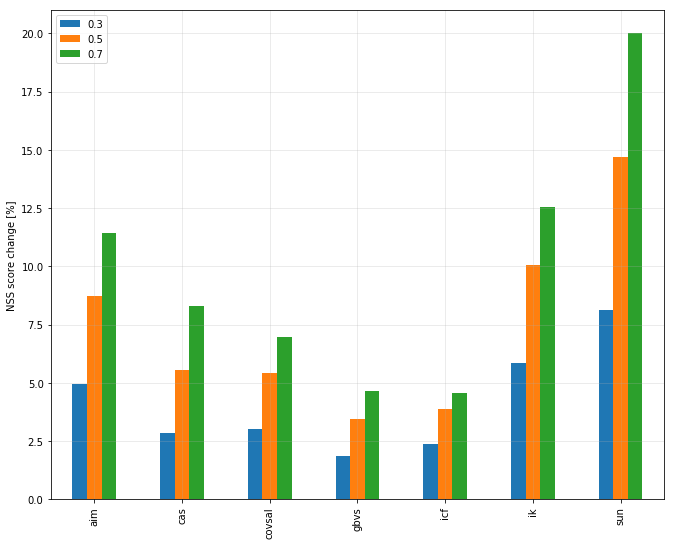

In [18]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [15]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,5.031345,8.924591,11.726680
person,7.331736,13.034401,17.188147
no person,0.110851,0.147006,0.076151
animal,2.053200,3.768064,5.124575
sports,2.710200,4.914214,6.669909
electronic,7.625901,13.578622,17.887891
mean context,4.143872,7.394483,9.778892


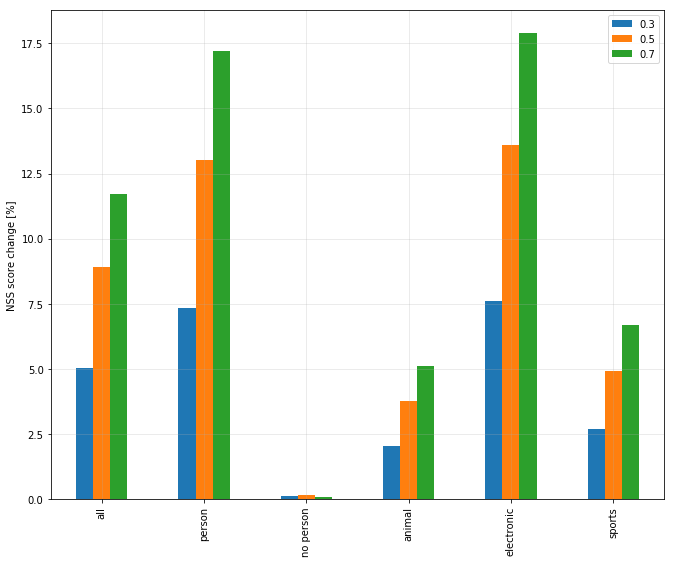

In [17]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)